# Cleaning Process Result Plotting

In [1]:
RAW_DATA_PATH = "../output/raw-csv"
DATA_PATH = "../output/csv"
STAT_PATH = "../output/csv-stat"
OUTPUT_STAT_PATH = "../output/csv-stat"

In [2]:
from pathlib import Path
from pandas import to_datetime, read_csv
from logging import basicConfig, INFO
from matplotlib import font_manager, pyplot as plt

basicConfig(level=INFO)

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

In [3]:
RAW_DATA_PATH = Path(RAW_DATA_PATH).resolve()
DATA_PATH = Path(DATA_PATH).resolve()
STAT_PATH = Path(STAT_PATH).resolve()
OUTPUT_STAT_PATH = Path(OUTPUT_STAT_PATH).resolve()
OUTPUT_STAT_PATH.mkdir(parents=True, exist_ok=True)

## Data Quality

In [4]:
stat_df = read_csv(STAT_PATH / "stat.csv")
stat_df.sort_values(by="valid", inplace=True)

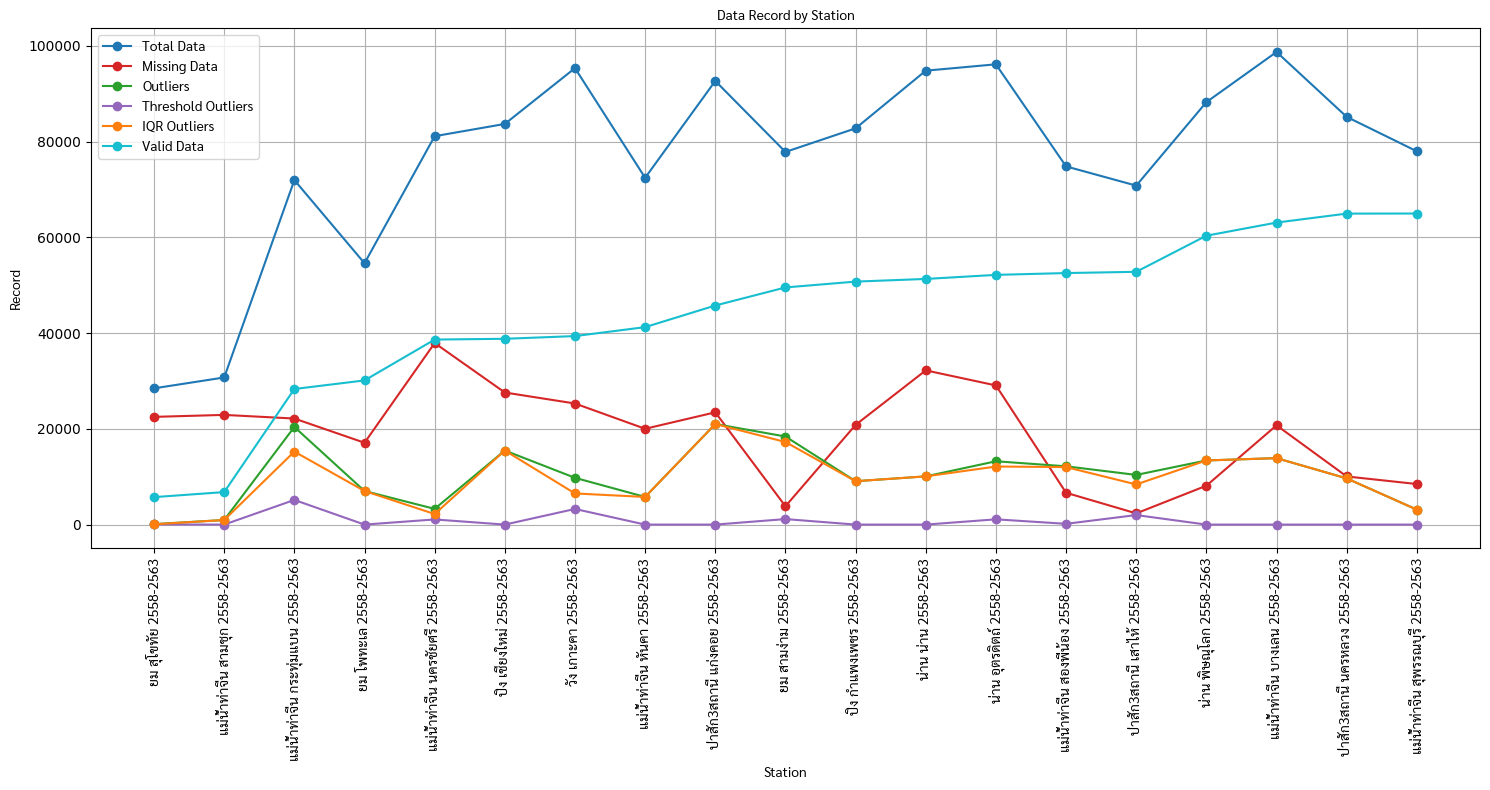

In [5]:
plt.figure(figsize=(15, 8))
plt.plot(stat_df["station"], stat_df["total"], label="Total Data", marker="o", color="#1f77b4")
plt.plot(stat_df["station"], stat_df["missing"], label="Missing Data", marker="o", color="#d62728")
plt.plot(stat_df["station"], stat_df["outliers"], label="Outliers", marker="o", color="#2ca02c")
plt.plot(stat_df["station"], stat_df["threshold_outliers"], label="Threshold Outliers", marker="o", color="#9467bd")
plt.plot(stat_df["station"], stat_df["iqr_outliers"], label="IQR Outliers", marker="o", color="#ff7f0e")
plt.plot(stat_df["station"], stat_df["valid"], label="Valid Data", marker="o", color="#17becf")

plt.xlabel("Station", fontproperties=font_prop)
plt.ylabel("Record", fontproperties=font_prop)
plt.title("Data Record by Station", fontproperties=font_prop)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.tight_layout()
plt.savefig(OUTPUT_STAT_PATH / "record.png")
plt.show()


## Data Cleaning Result

In [6]:
def iter_files(dir_: Path):
    for file in filter(lambda x: x.is_file() and x.is_file(), dir_.iterdir()):
        yield (file.name.split(".")[0], file)

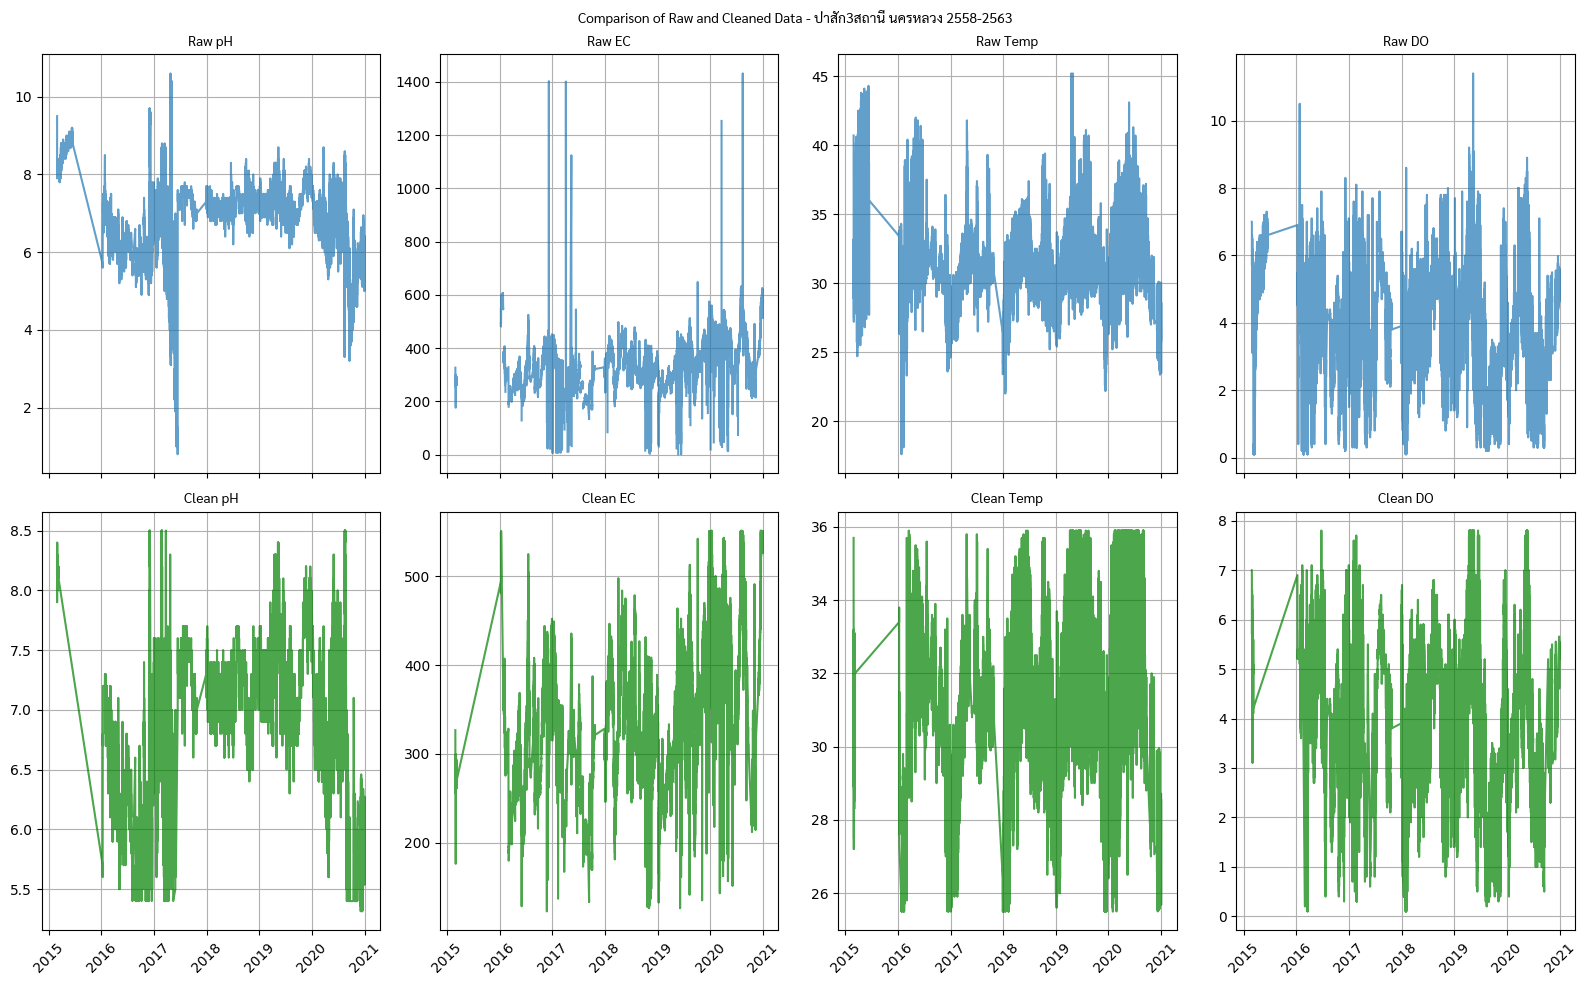

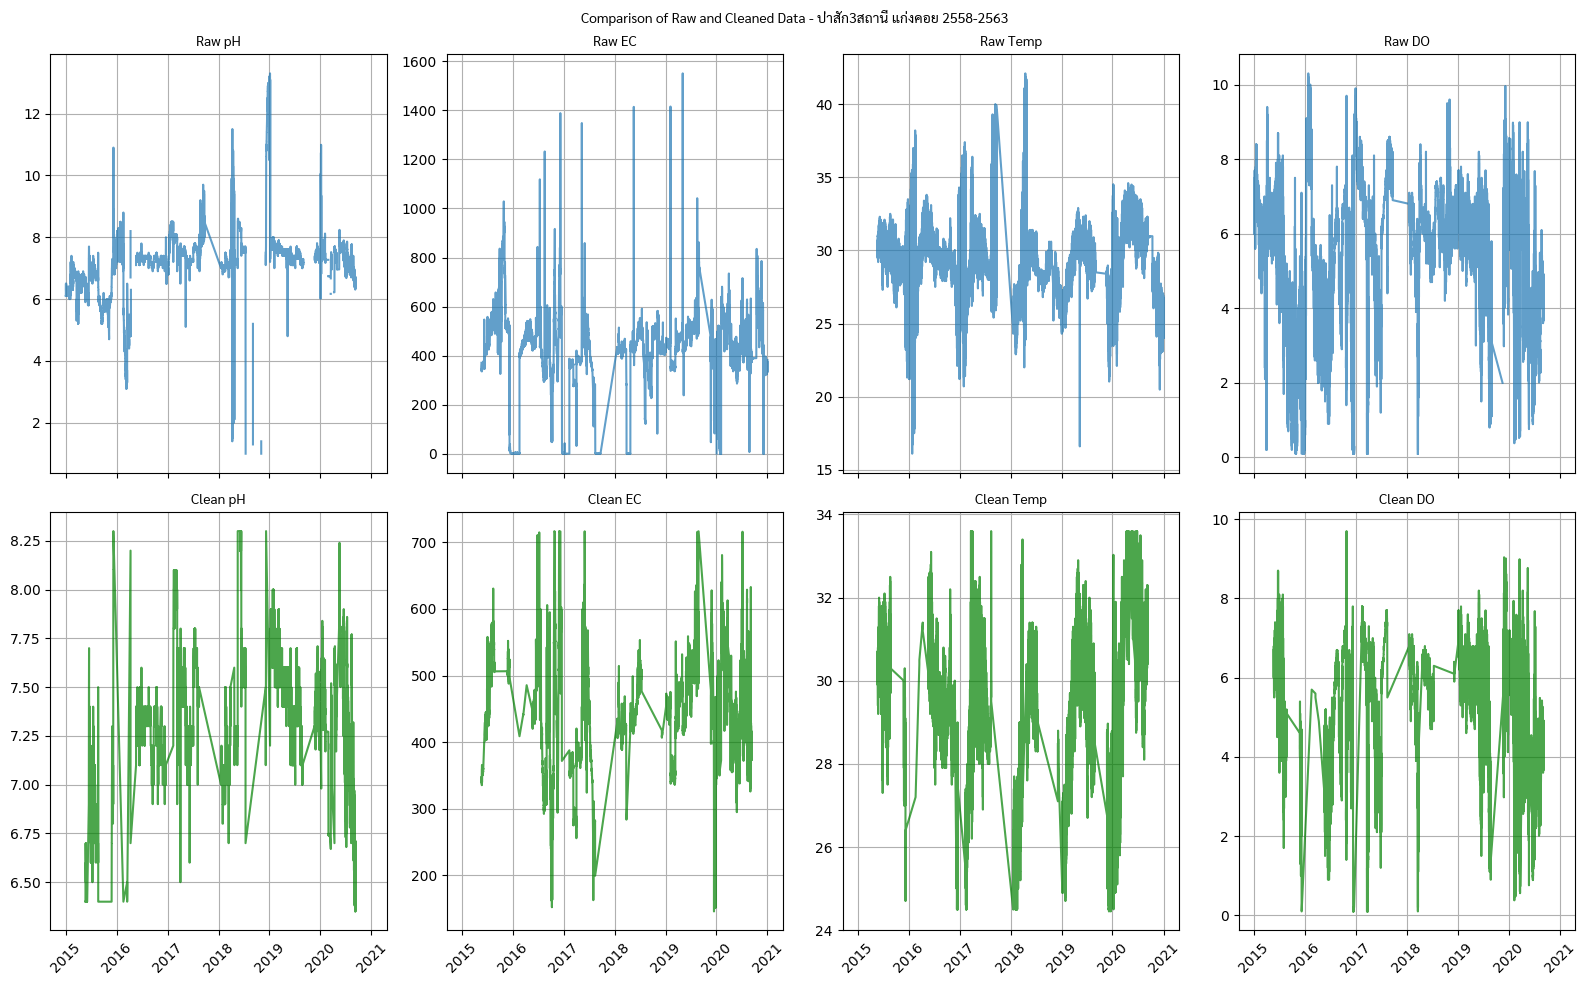

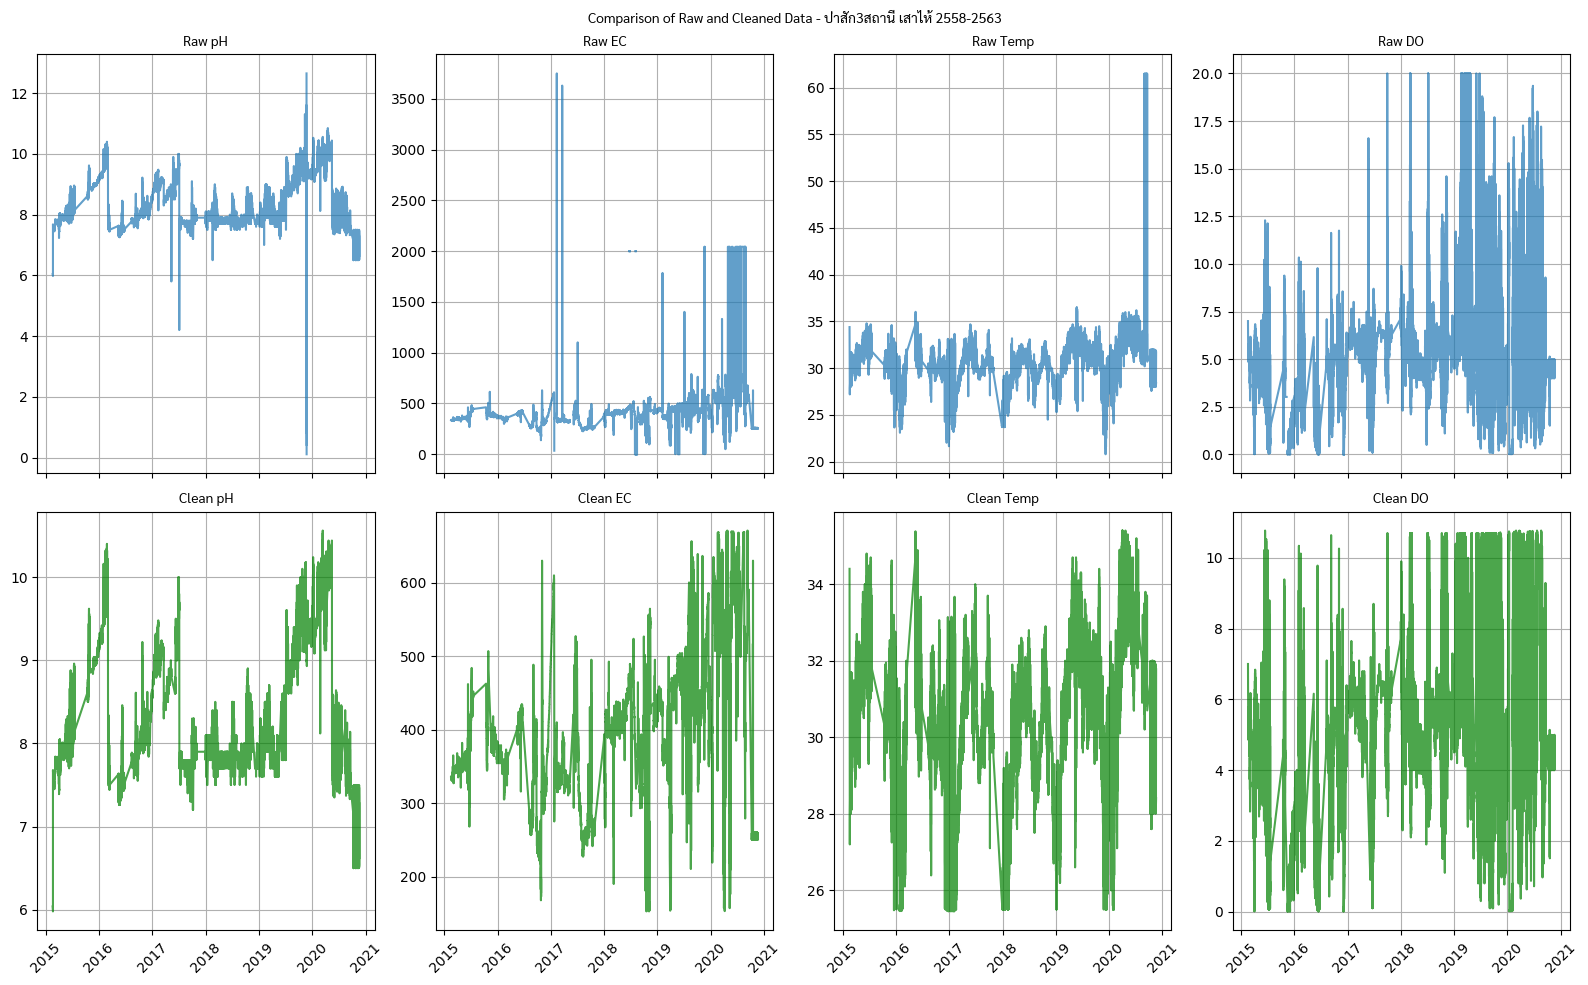

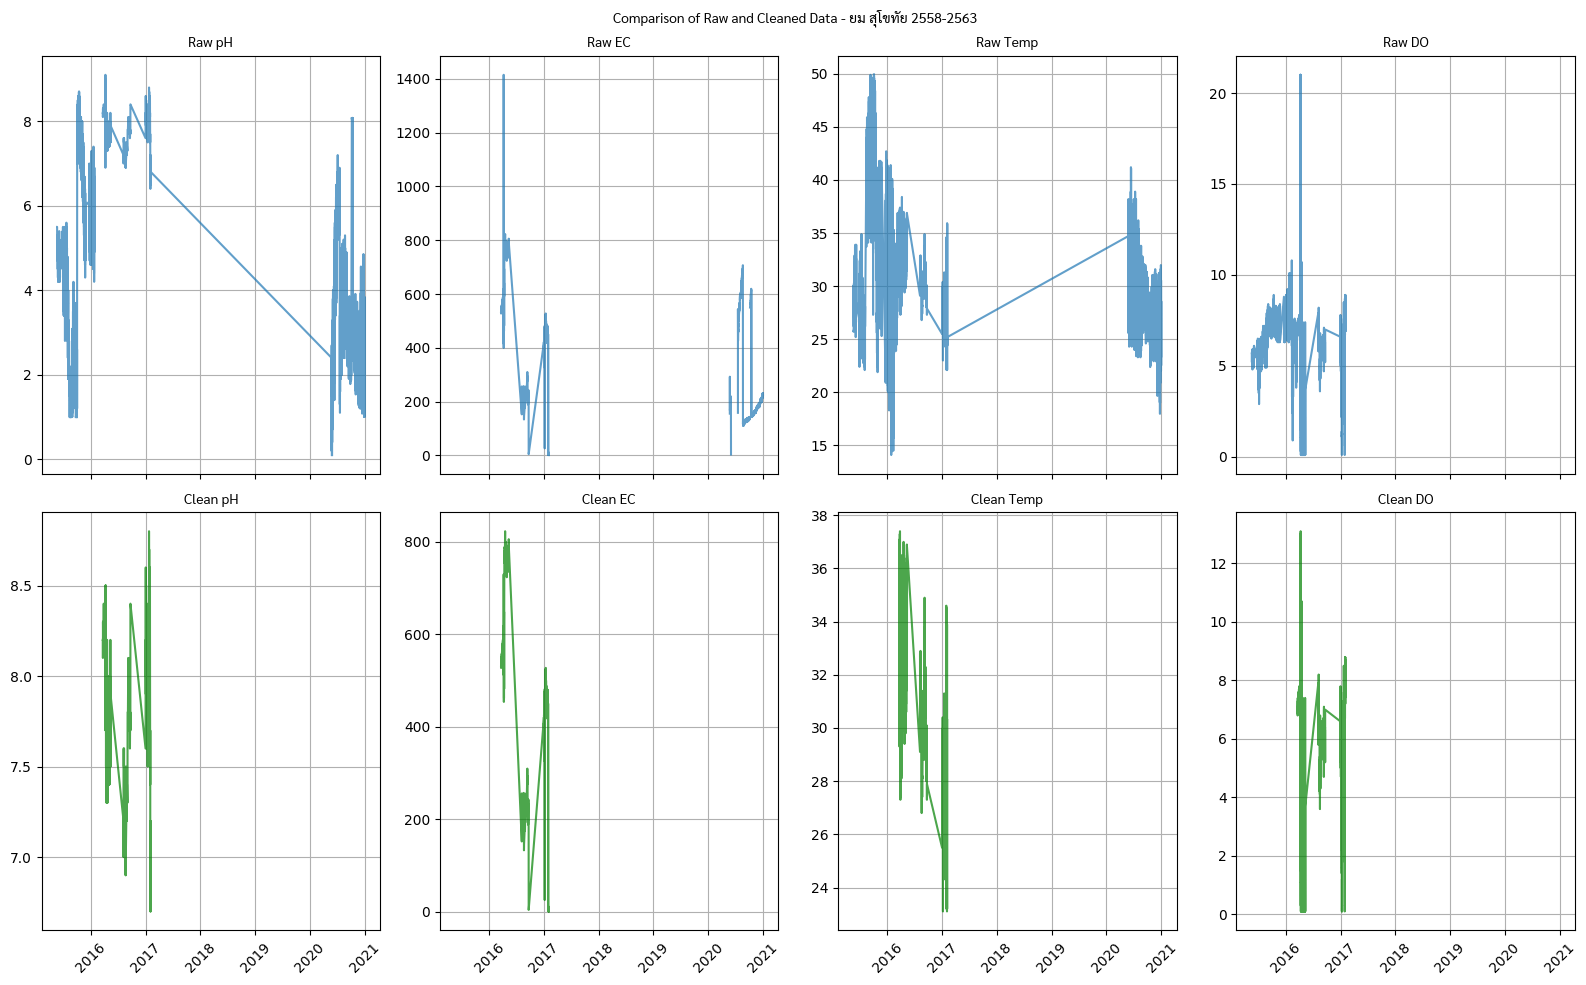

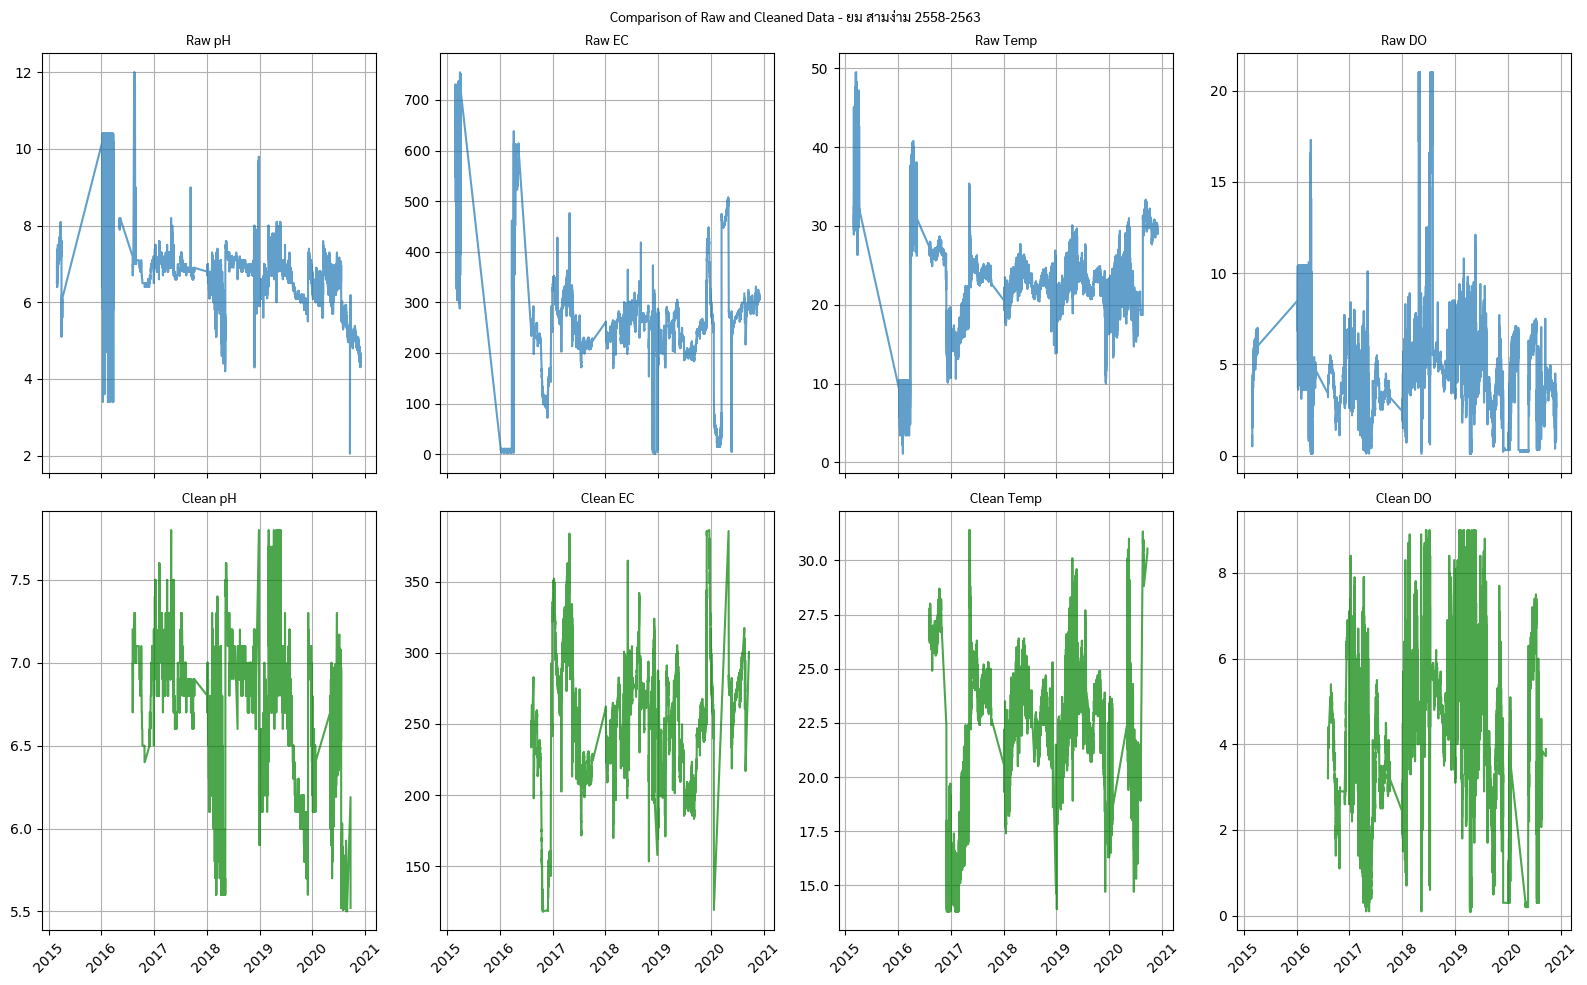

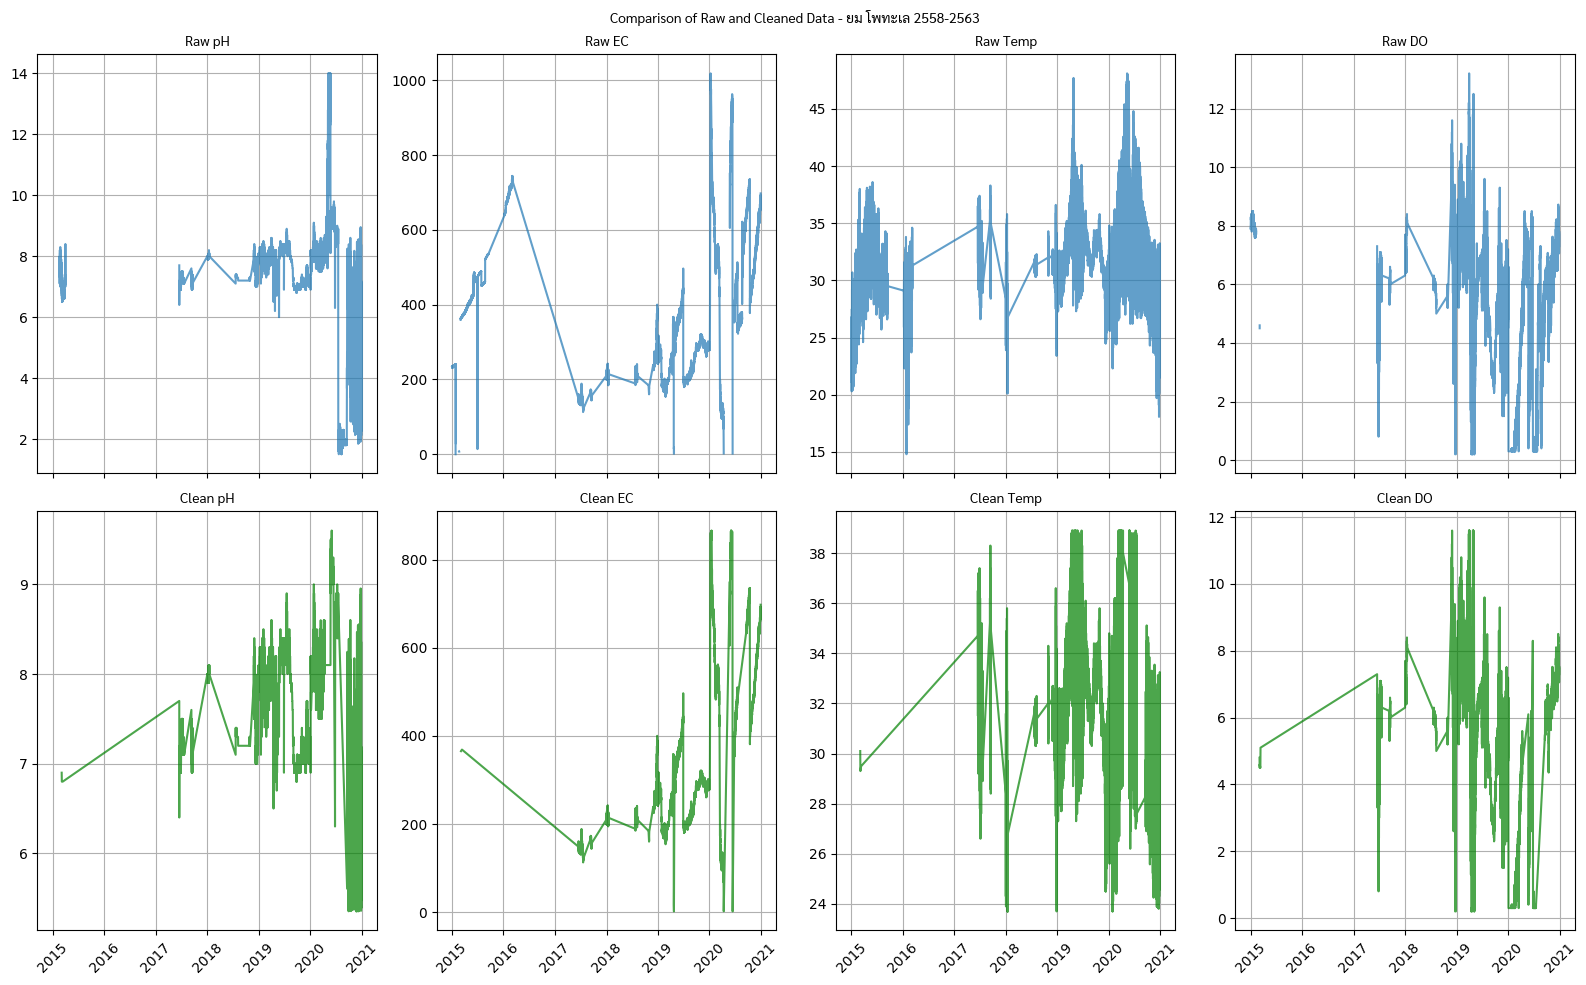

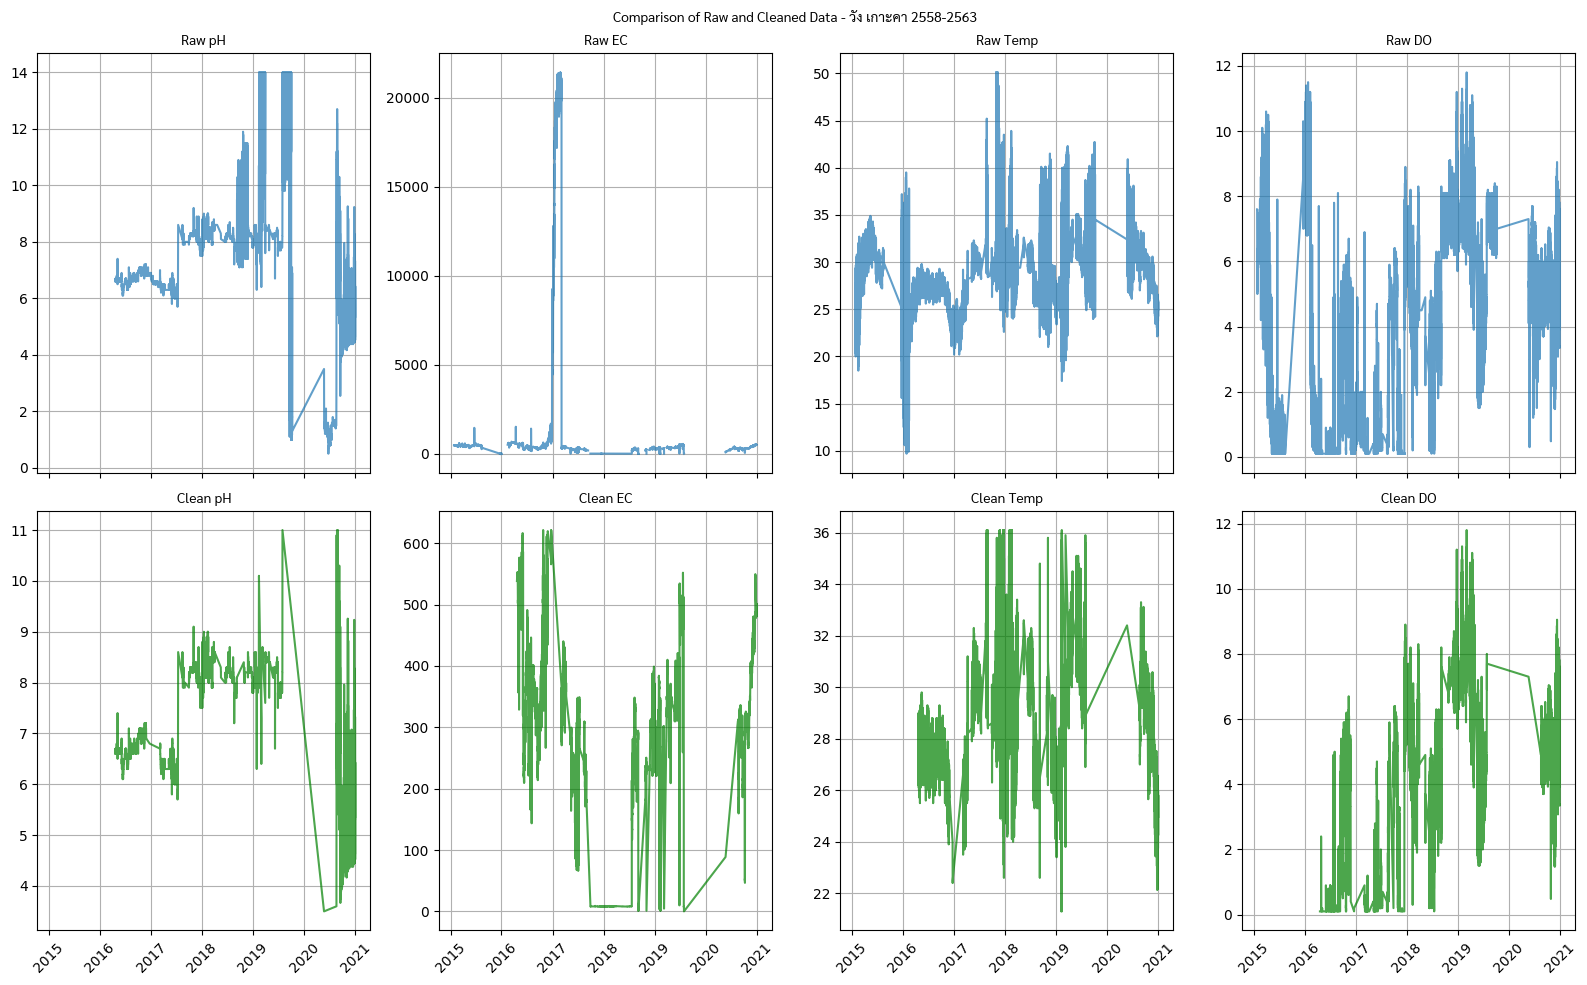

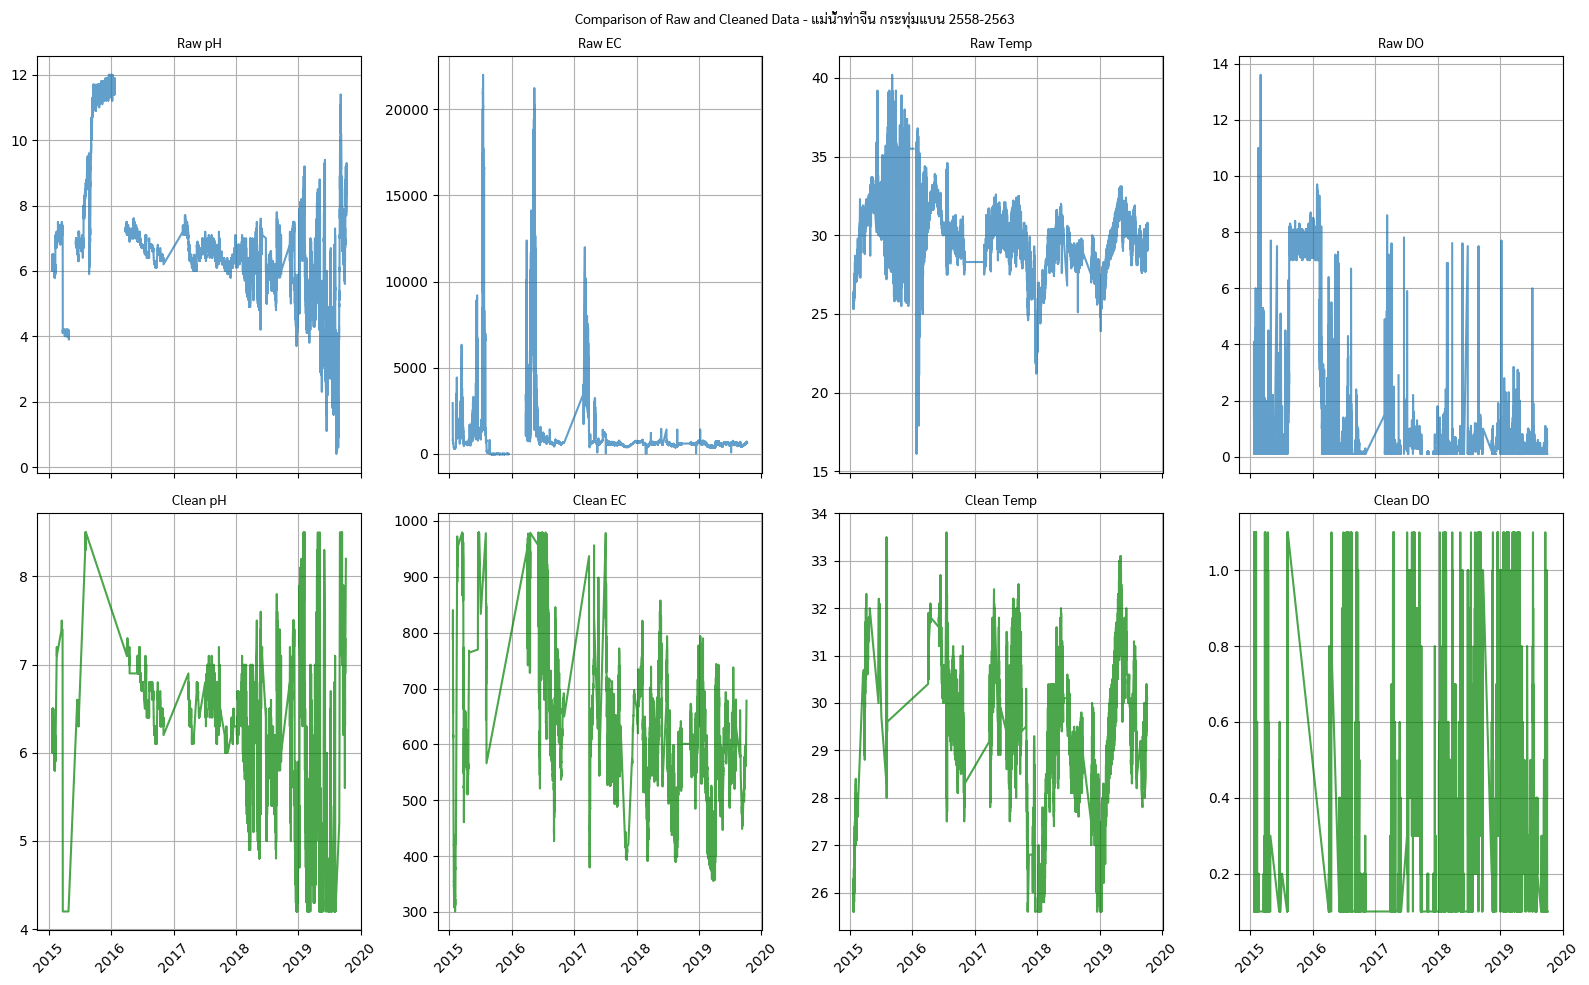

/tmp/ipykernel_1555347/123201813.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = read_csv(RAW_DATA_PATH / file.name)


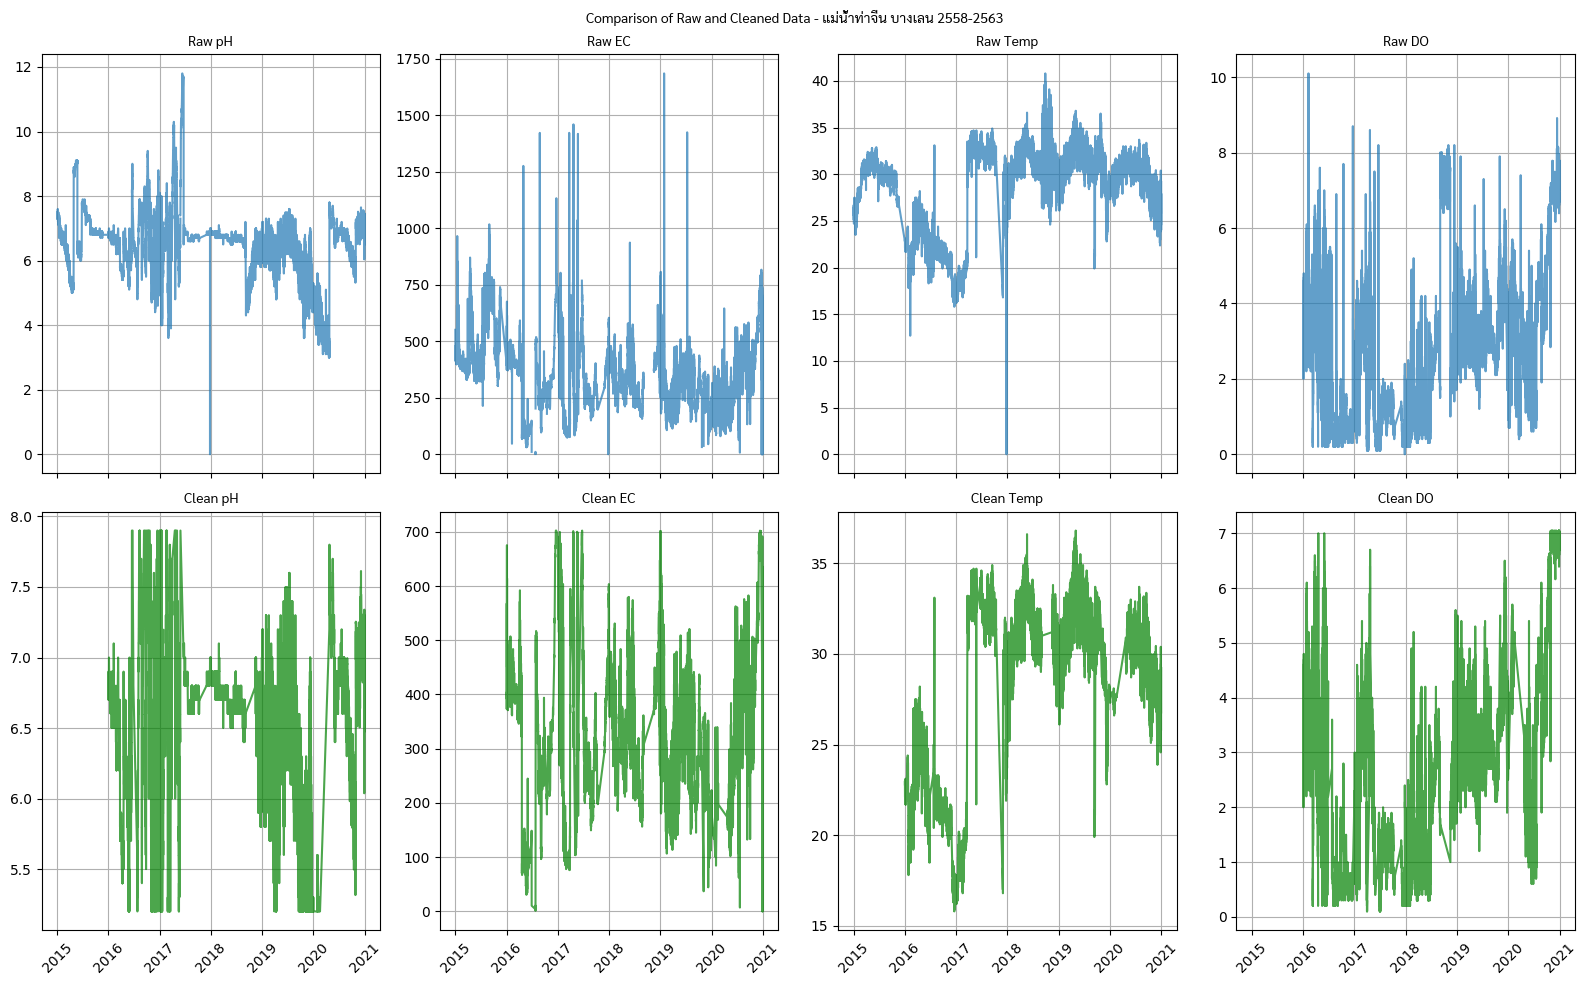

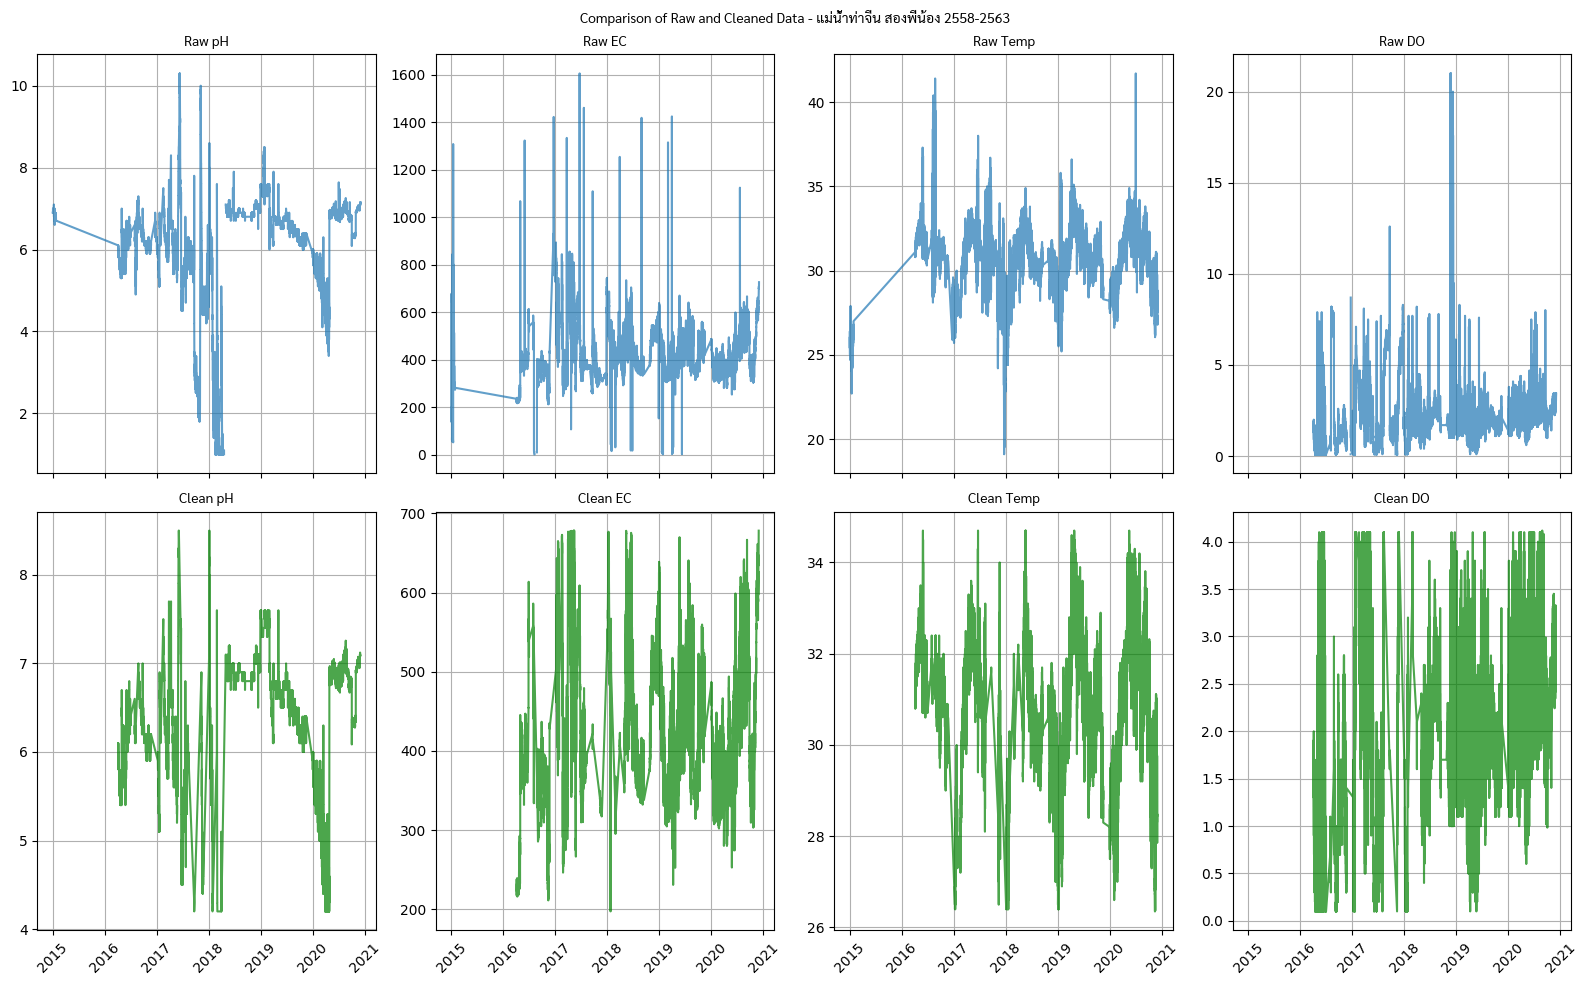

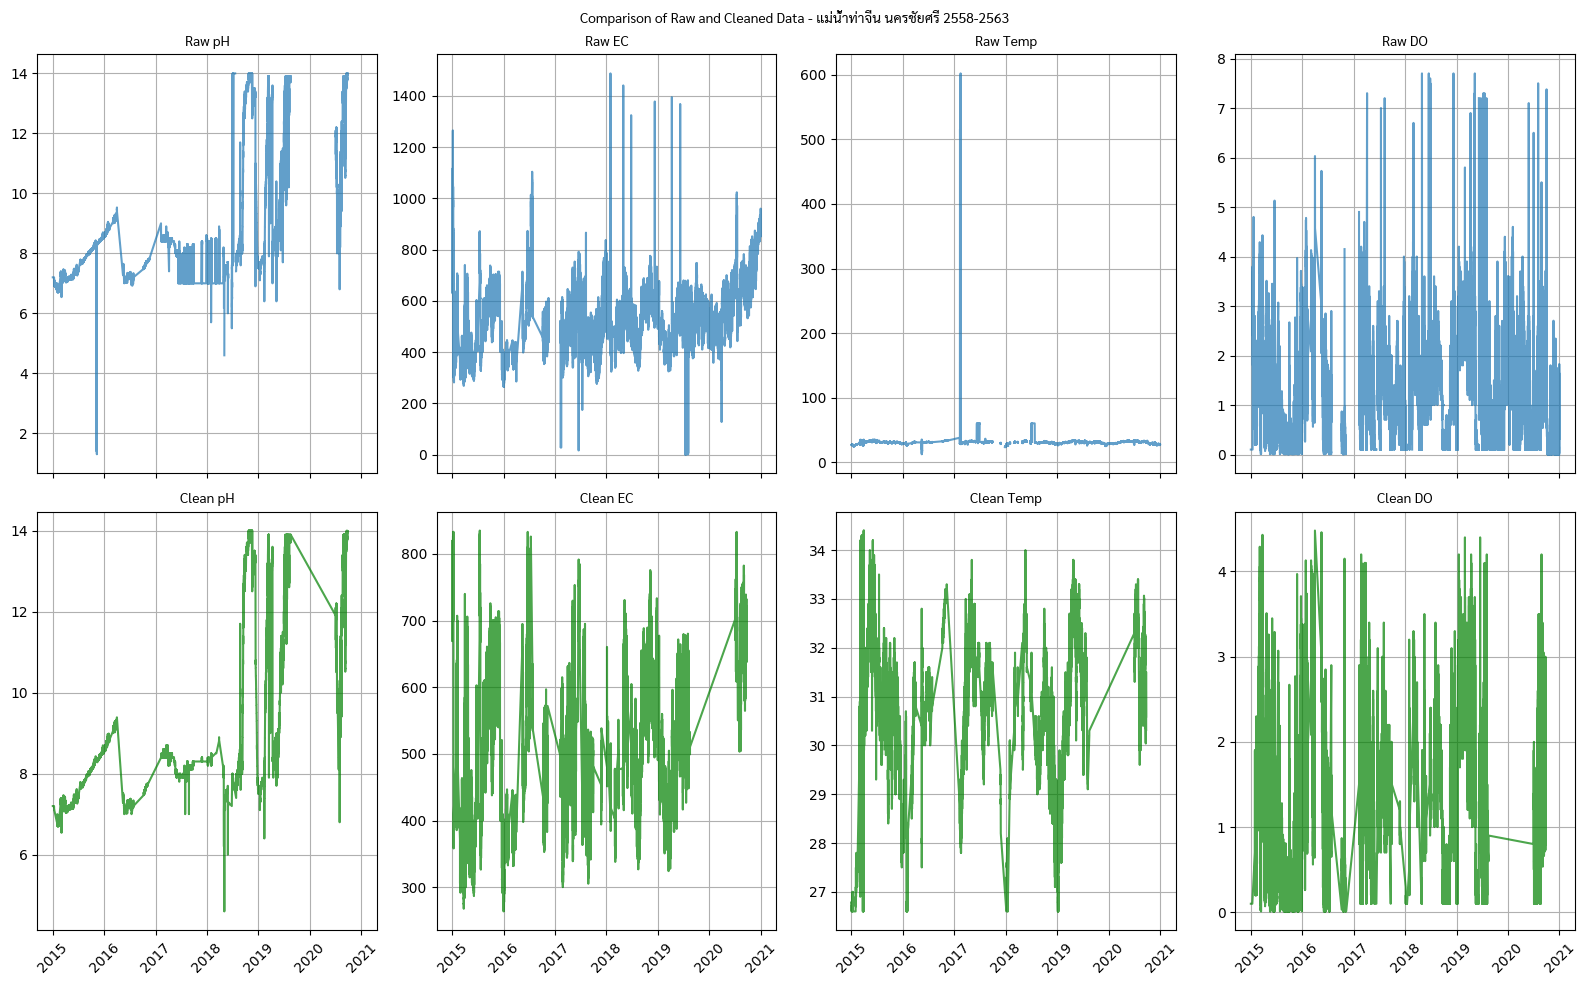

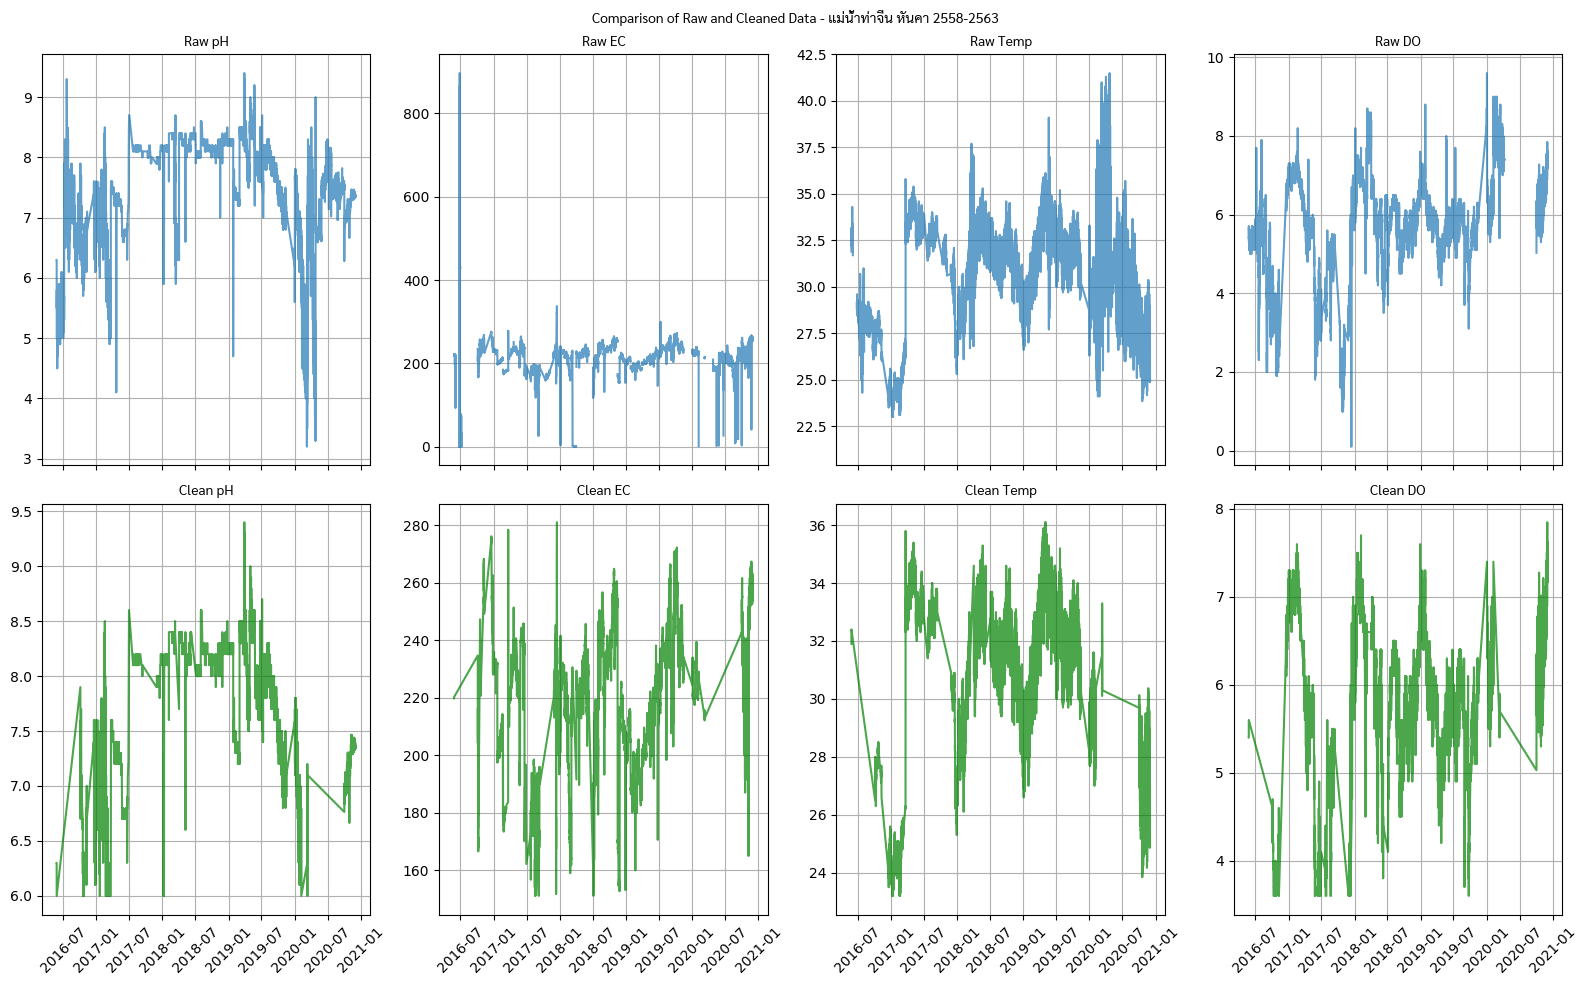

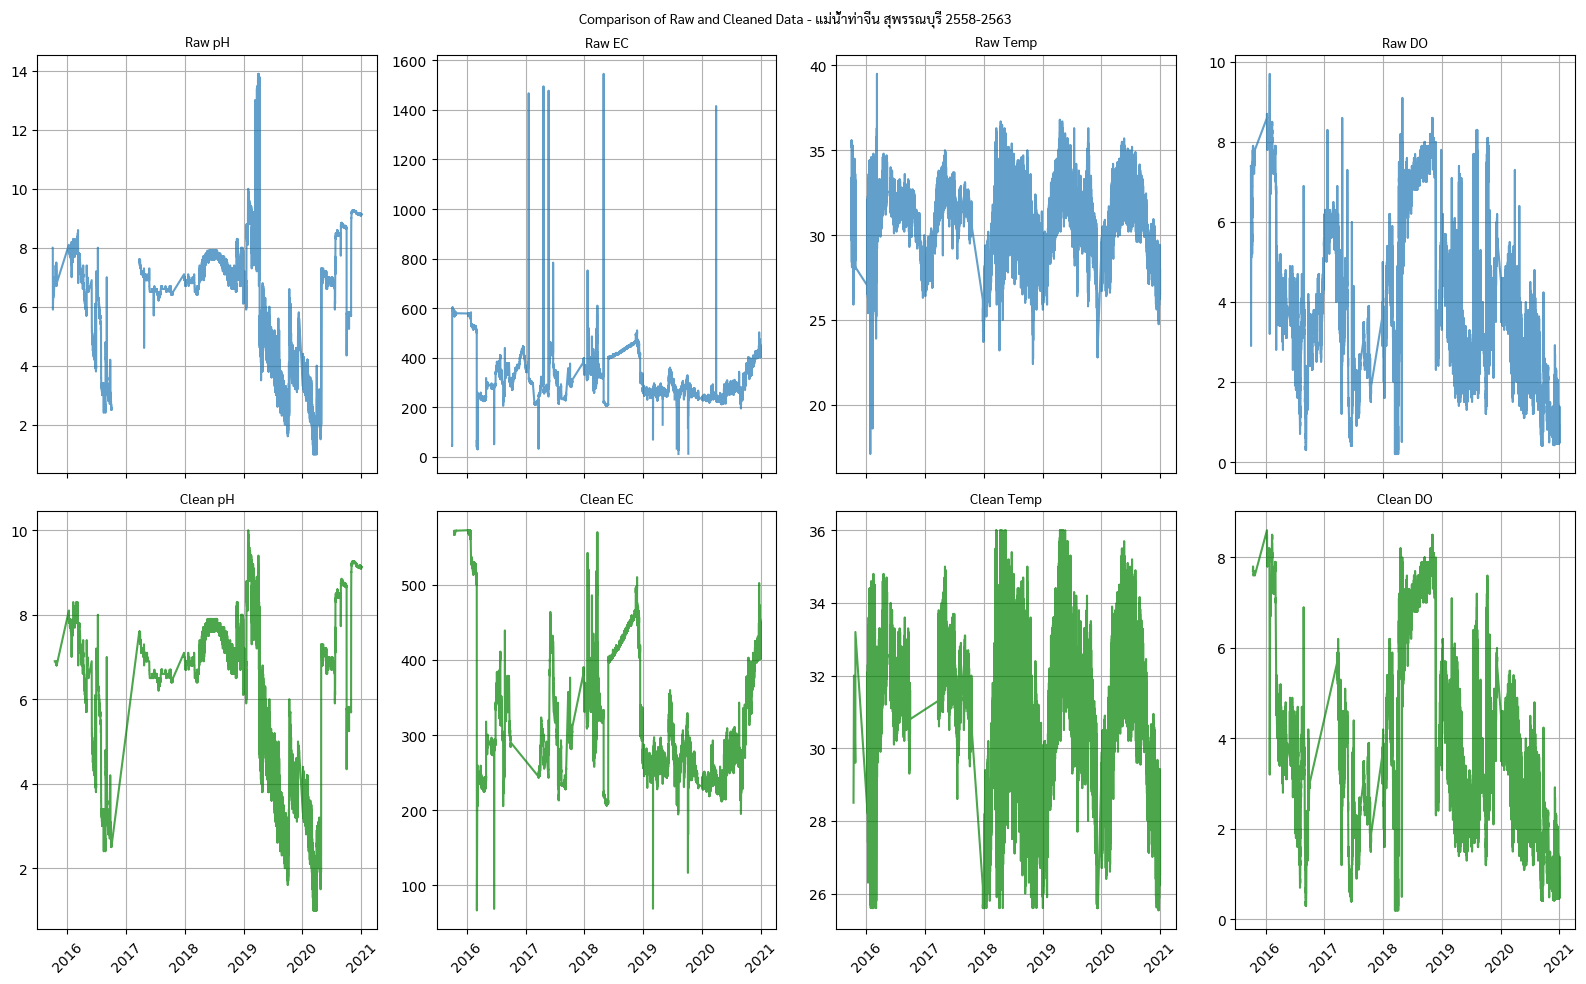

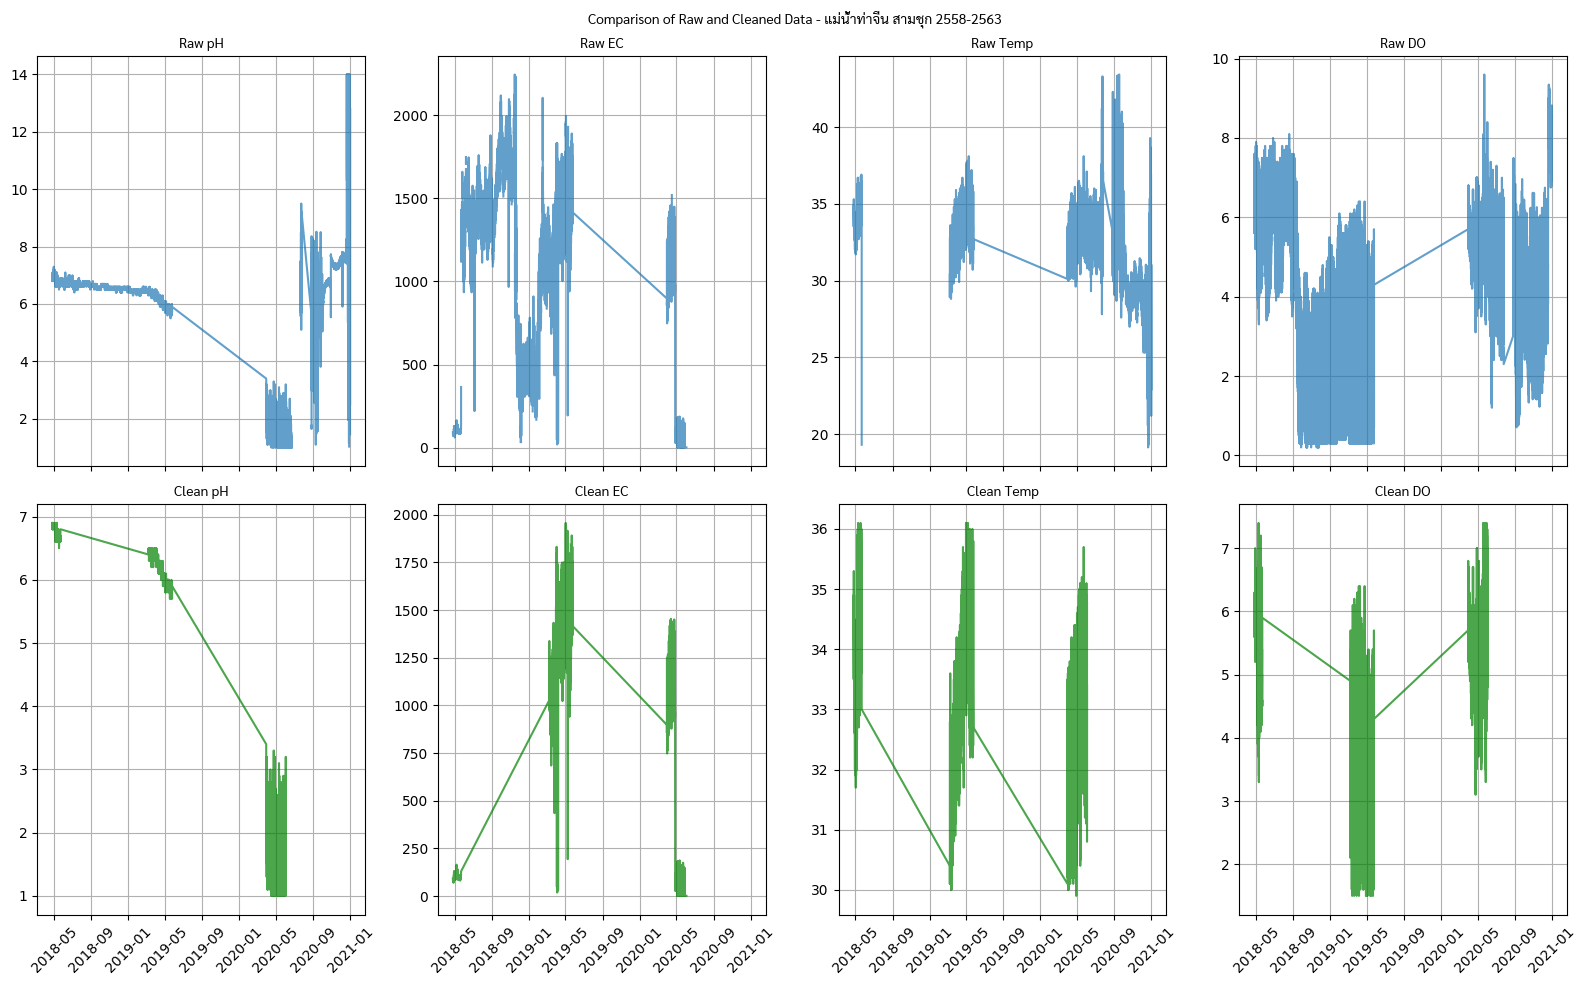

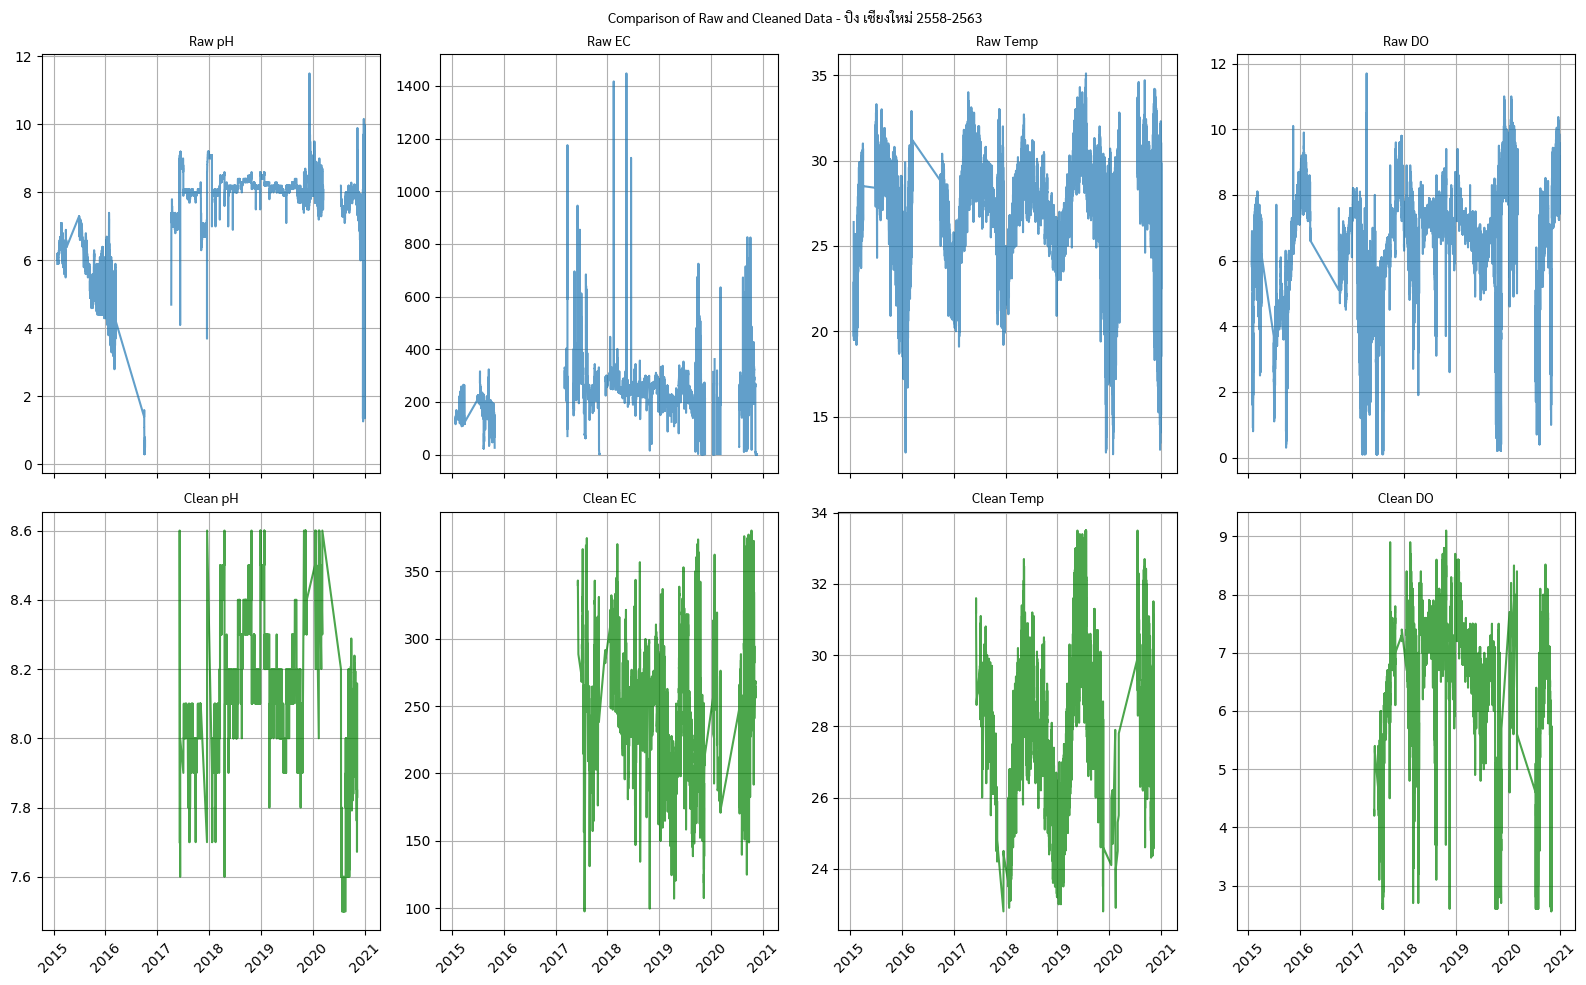

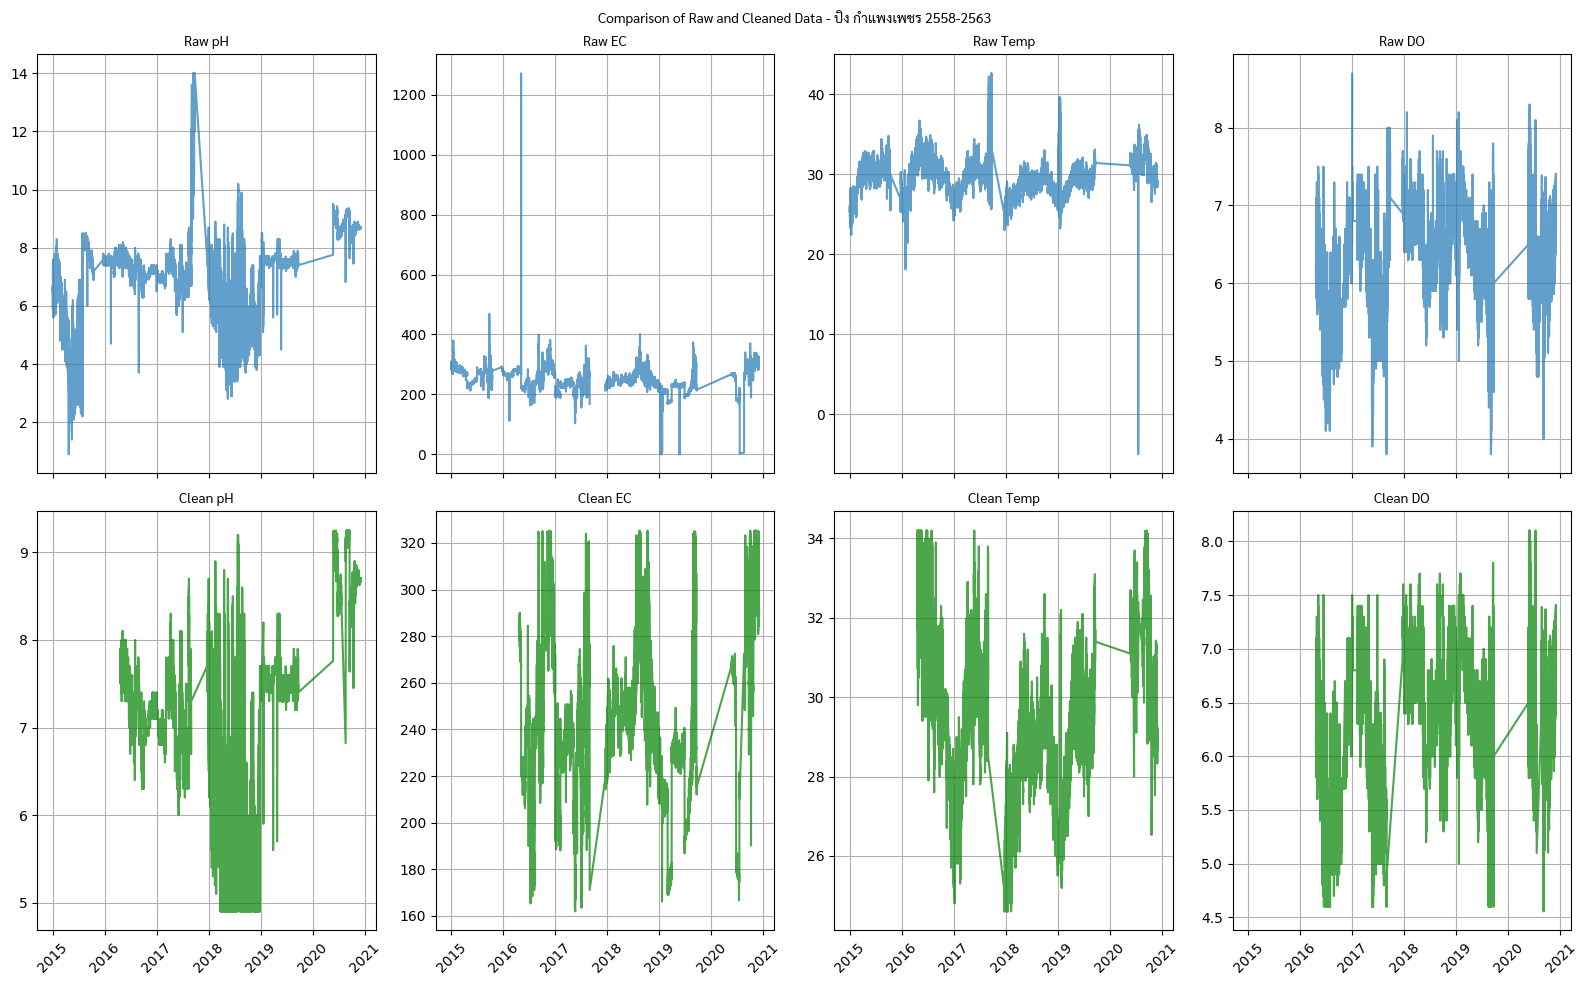

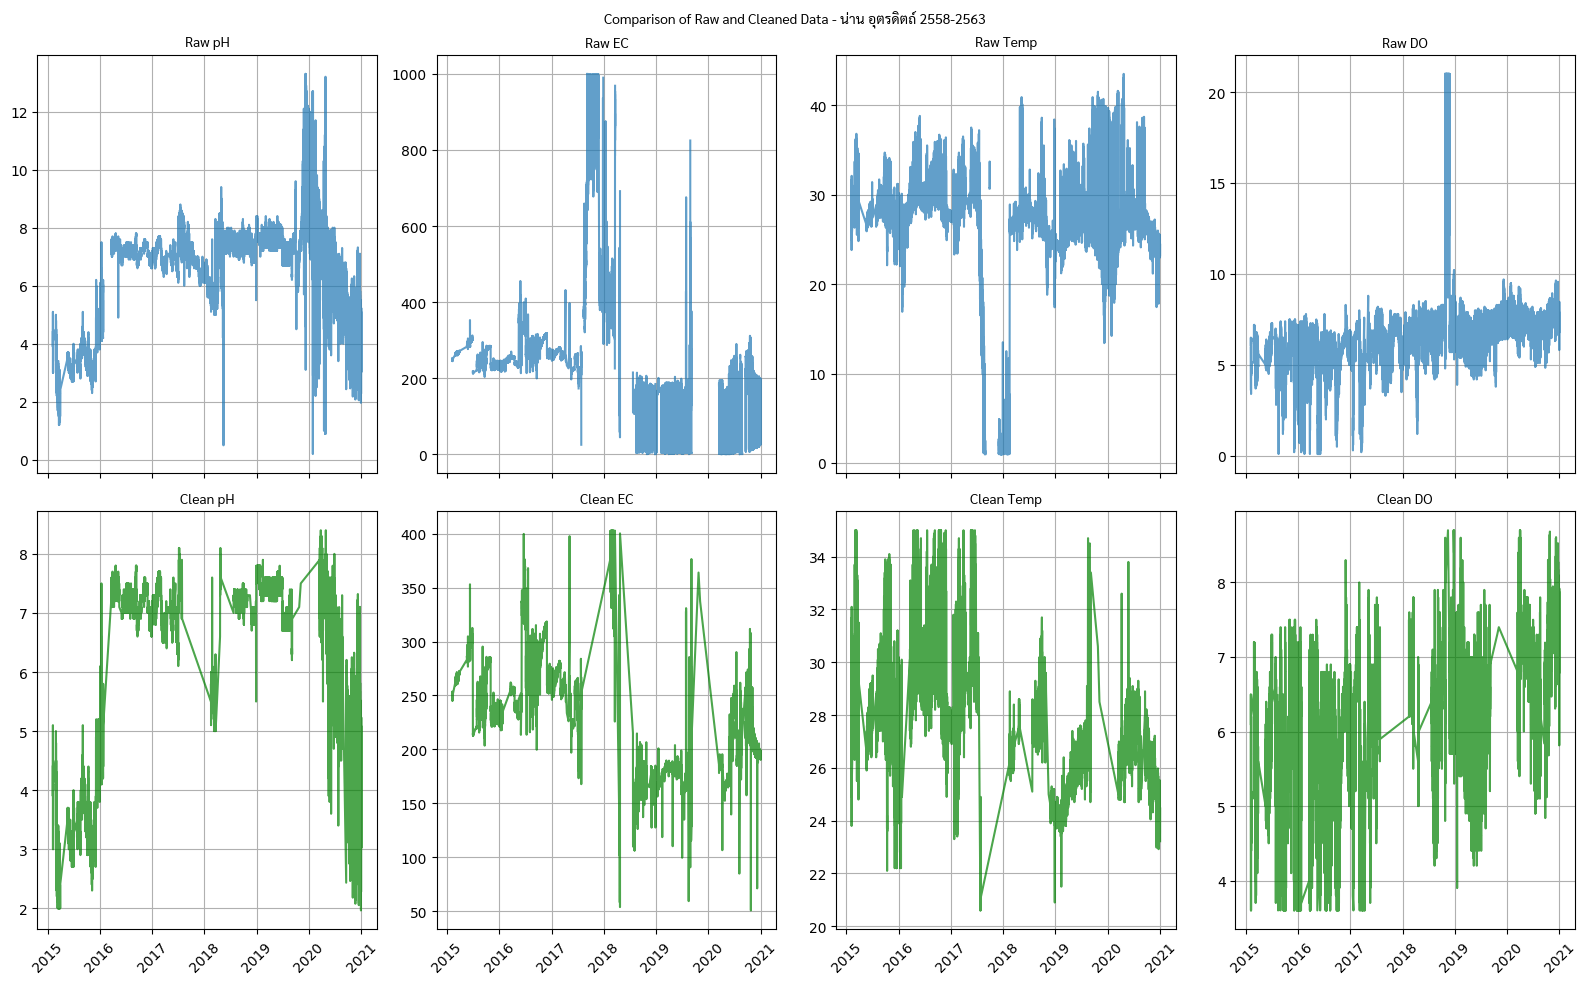

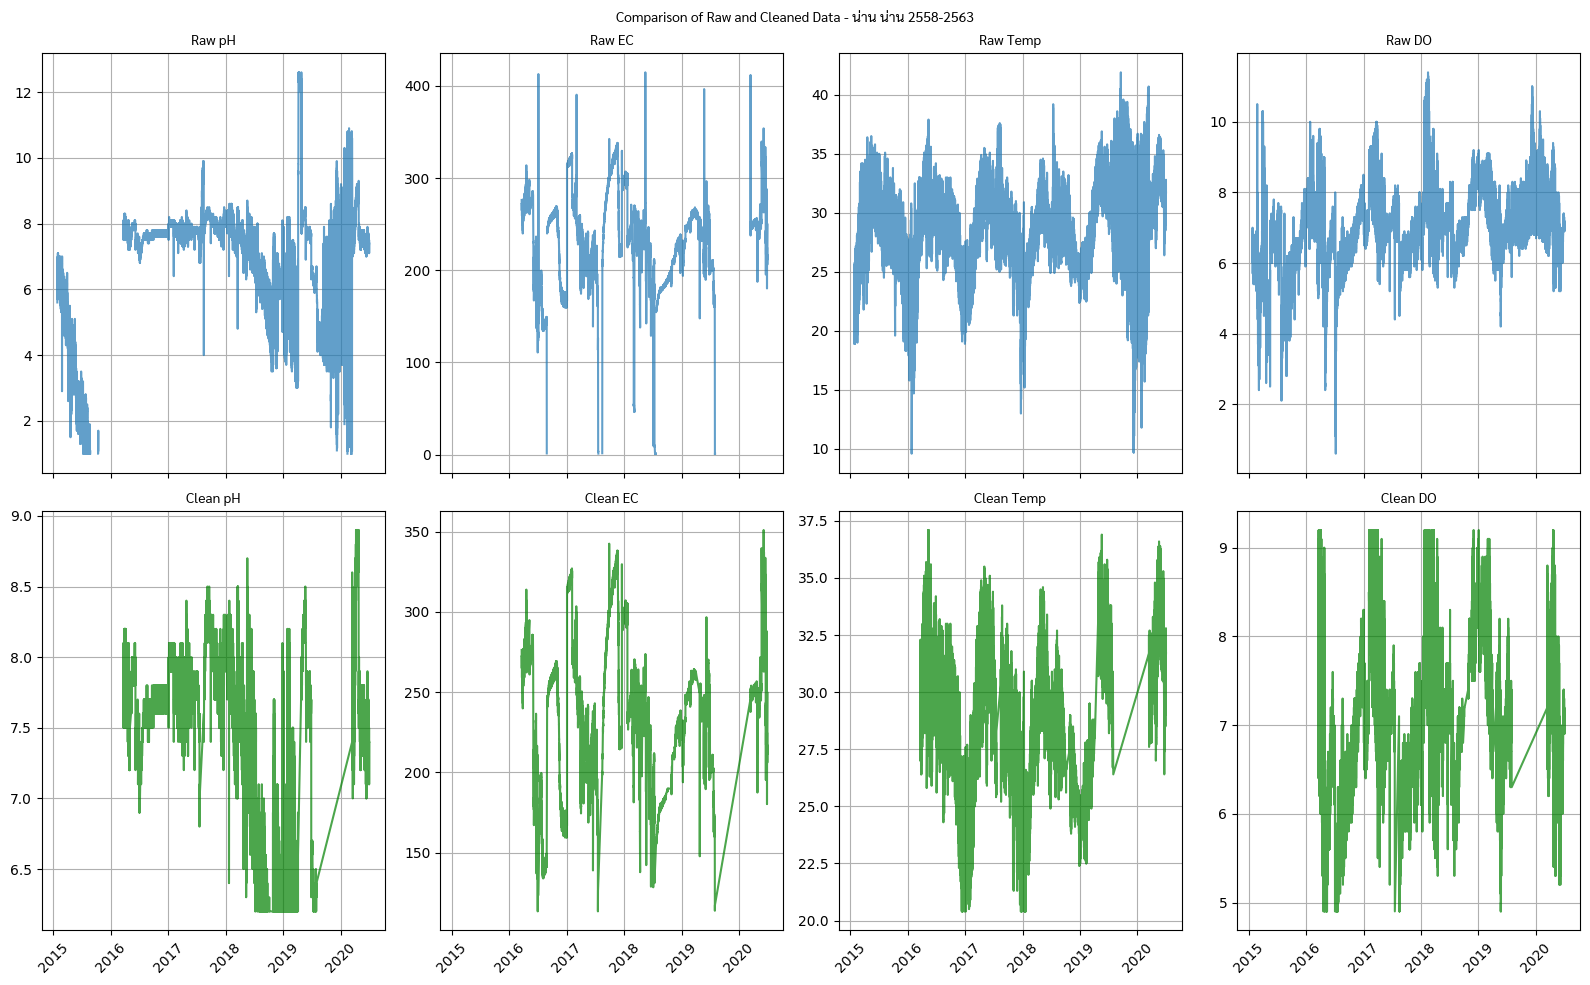

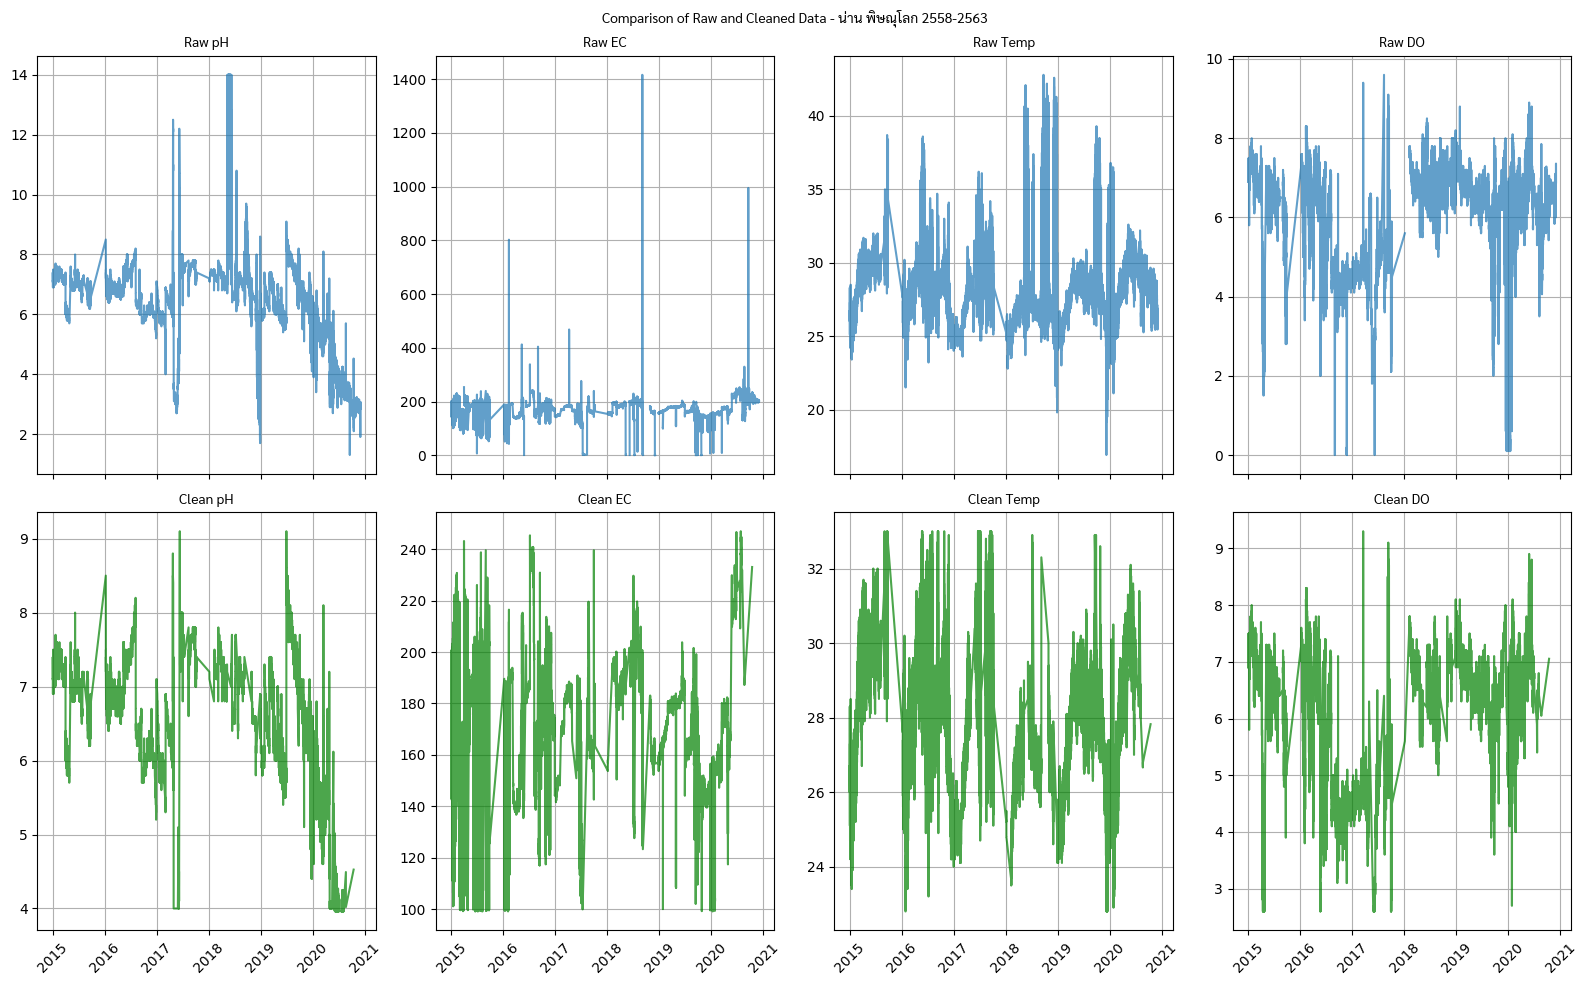

In [7]:
for station, file in iter_files(DATA_PATH):
    raw_df = read_csv(RAW_DATA_PATH / file.name)
    clean_df = read_csv(file)
    
    raw_df["Datetime"] = to_datetime(raw_df["Datetime"])
    clean_df["Datetime"] = to_datetime(clean_df["Datetime"])

    fig, axes = plt.subplots(2, 4, figsize=(16, 10), sharex=True)
    params = ["pH", "EC", "Temp", "DO"]
    
    for i, param in enumerate(params):
        axes[0, i].plot(raw_df["Datetime"], raw_df[param], label="Raw Data", alpha=0.7)
        axes[0, i].set_title(f"Raw {param}", fontproperties=font_prop)
        axes[0, i].grid(True)
        axes[0, i].tick_params(axis='x', rotation=45)

        axes[1, i].plot(clean_df["Datetime"], clean_df[param], label="Cleaned Data", alpha=0.7, color="green")
        axes[1, i].set_title(f"Clean {param}", fontproperties=font_prop)
        axes[1, i].grid(True)
        axes[1, i].tick_params(axis='x', rotation=45)

    fig.suptitle(f"Comparison of Raw and Cleaned Data - {station}", fontproperties=font_prop)
    plt.tight_layout()
    plt.savefig(OUTPUT_STAT_PATH / f"comparison-{station}.png")
    plt.show()